# Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [ ]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 90.7MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/climate-data.csv")

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


array([[<Axes: title={'center': 'meantemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'meanpressure'}>]], dtype=object)

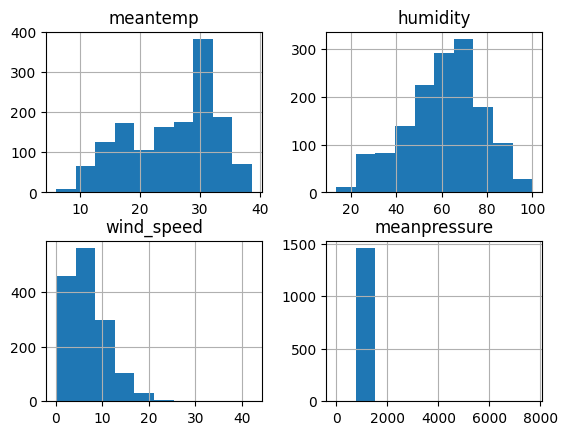

In [ ]:
df.hist()

In [ ]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [ ]:
dates=['2017-01-01','2016-12-31','2016-12-30']
cols=['meantemp','humidity', 'wind_speed', 'meanpressure']

In [ ]:
data=df.copy()

In [ ]:
for i in range(3,0,-1):
  for c in cols:
    data[c+' day_'+str(i)]=data[c].shift(i)



In [ ]:

data.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp day_3,humidity day_3,wind_speed day_3,meanpressure day_3,meantemp day_2,humidity day_2,wind_speed day_2,meanpressure day_2,meantemp day_1,humidity day_1,wind_speed day_1,meanpressure day_1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.5,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.0,84.5,0.00,1015.666667,7.400000,92.0,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.4,92.0,2.98,1017.800000,7.166667,87.0,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667


In [ ]:
data=data.drop(columns=['humidity','wind_speed','meanpressure'])

In [ ]:
data.head()


,date,meantemp,meantemp day_3,humidity day_3,wind_speed day_3,meanpressure day_3,meantemp day_2,humidity day_2,wind_speed day_2,meanpressure day_2,meantemp day_1,humidity day_1,wind_speed day_1,meanpressure day_1
0,2013-01-01,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,2013-01-03,7.166667,NaN,NaN,NaN,NaN,10.000000,84.5,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,2013-01-04,8.666667,10.0,84.5,0.00,1015.666667,7.400000,92.0,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,7.4,92.0,2.98,1017.800000,7.166667,87.0,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667


In [ ]:
data=data.drop(columns=['date'])

In [ ]:
data=data.dropna(axis=0).reset_index()

In [ ]:
data.head()

,index,meantemp,meantemp day_3,humidity day_3,wind_speed day_3,meanpressure day_3,meantemp day_2,humidity day_2,wind_speed day_2,meanpressure day_2,meantemp day_1,humidity day_1,wind_speed day_1,meanpressure day_1
0,3,8.666667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
1,4,6.000000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2,5,7.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
3,6,7.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
4,7,8.857143,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000


In [ ]:
data.columns

Index(['index', 'meantemp', 'meantemp day_3', 'humidity day_3',
       'wind_speed day_3', 'meanpressure day_3', 'meantemp day_2',
       'humidity day_2', 'wind_speed day_2', 'meanpressure day_2',
       'meantemp day_1', 'humidity day_1', 'wind_speed day_1',
       'meanpressure day_1'],
      dtype='object')

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
X,Y=data.drop(columns=['index','meantemp']),data['meantemp']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
X_train.shape

(1313, 3, 4)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],3,4)
X_test=X_test.reshape(X_test.shape[0],3,4)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


array([[[0.12227074, 0.84037162, 0.        , 0.09570351],
        [0.04279476, 0.92905405, 0.07058266, 0.09599301],
        [0.0356623 , 0.86993243, 0.10974262, 0.09611062]],

       [[0.04279476, 0.92905405, 0.07058266, 0.09599301],
        [0.0356623 , 0.86993243, 0.10974262, 0.09611062],
        [0.08151383, 0.68468468, 0.02921206, 0.09590706]],

       [[0.0356623 , 0.86993243, 0.10974262, 0.09611062],
        [0.08151383, 0.68468468, 0.02921206, 0.09590706],
        [0.        , 0.86796171, 0.08763619, 0.09581659]],

       ...,

       [[0.81195415, 0.59279983, 0.12908574, 0.09337389],
        [0.82872392, 0.59665916, 0.18777304, 0.09341159],
        [0.84978166, 0.57038288, 0.10232117, 0.09348698]],

       [[0.82872392, 0.59665916, 0.18777304, 0.09341159],
        [0.84978166, 0.57038288, 0.10232117, 0.09348698],
        [0.7356623 , 0.73986486, 0.16406127, 0.09368602]],

       [[0.84978166, 0.57038288, 0.10232117, 0.09348698],
        [0.7356623 , 0.73986486, 0.16406127, 0.09

In [ ]:
from keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
import keras

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
history = model.fit(X_train, Y_train.values, epochs=18, batch_size=8,shuffle=False)


Epoch 1/18
165/165 [==============================] - 3s 16ms/step - loss: 10.1655 - mean_squared_error: 10.1655 - mean_absolute_error: 2.5754
Epoch 2/18
165/165 [==============================] - 2s 10ms/step - loss: 9.7086 - mean_squared_error: 9.7086 - mean_absolute_error: 2.5163
Epoch 3/18
165/165 [==============================] - 2s 11ms/step - loss: 9.3474 - mean_squared_error: 9.3474 - mean_absolute_error: 2.4693
Epoch 4/18
165/165 [==============================] - 2s 11ms/step - loss: 9.0708 - mean_squared_error: 9.0708 - mean_absolute_error: 2.4320
Epoch 5/18
165/165 [==============================] - 3s 20ms/step - loss: 8.8486 - mean_squared_error: 8.8486 - mean_absolute_error: 2.4010
Epoch 6/18
165/165 [==============================] - 2s 14ms/step - loss: 8.5470 - mean_squared_error: 8.5470 - mean_absolute_error: 2.3501
Epoch 7/18
165/165 [==============================] - 2s 10ms/step - loss: 8.5868 - mean_squared_error: 8.5868 - mean_absolute_error: 2.3623
Epoch 8/18


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

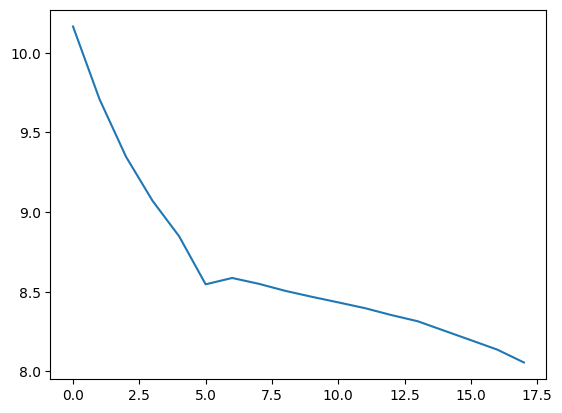

In [ ]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
y_p1=model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
mean_squared_error(y_p1, Y_test), mean_absolute_error(y_p1, Y_test), r2_score(y_p1, Y_test)

(19.537939982991066, 3.8699668433883136, -0.016759783494828318)

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

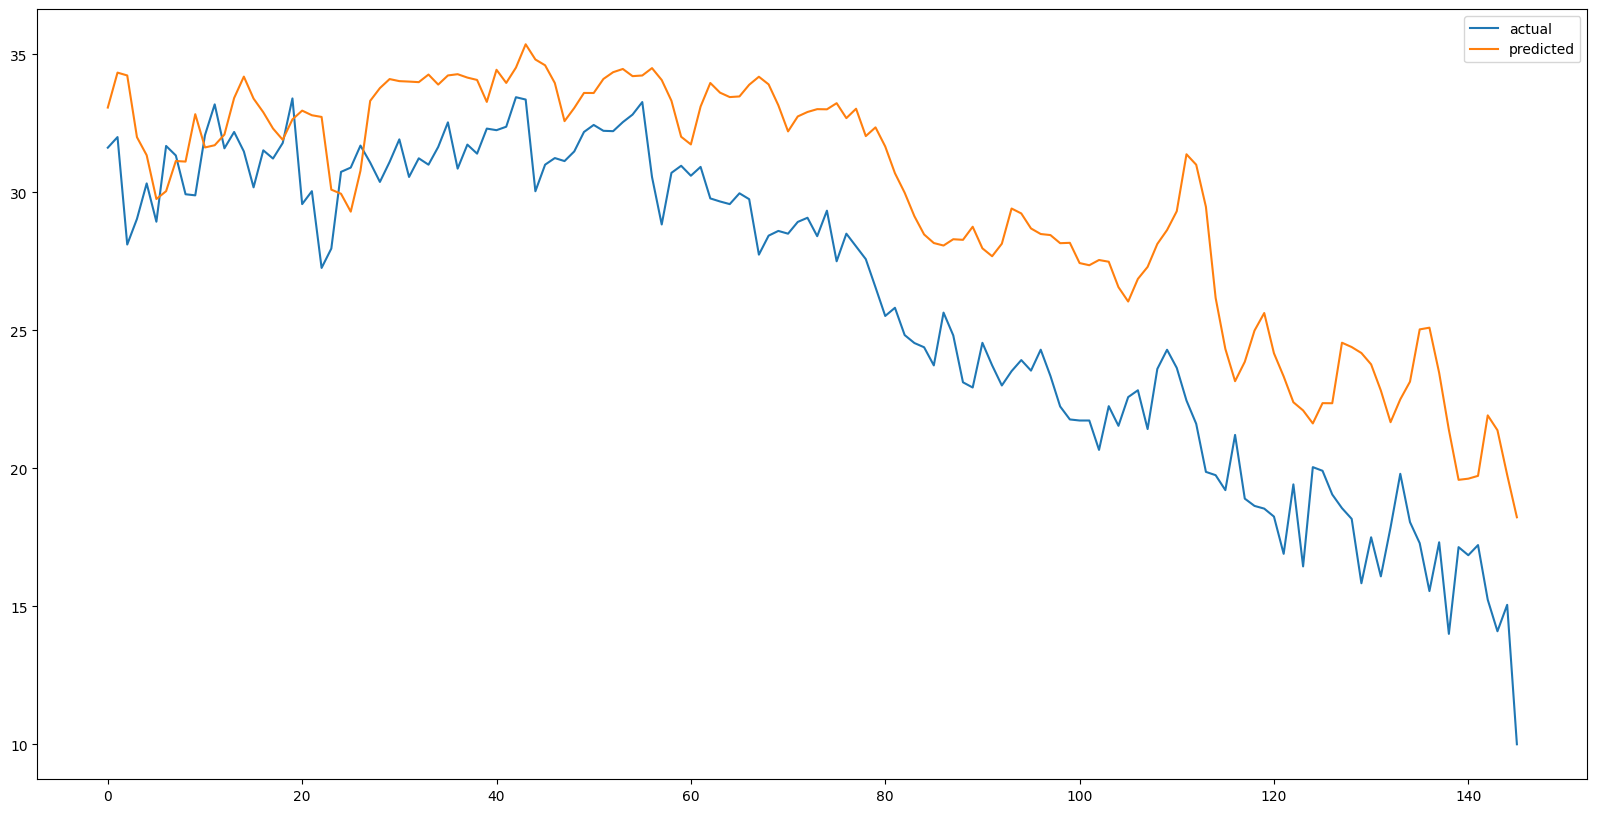

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(y_p1, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description* and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [2]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 34.9MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [3]:
df = pd.read_csv('wine-reviews.csv')

In [4]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [5]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [6]:
X, y = df['description'], df['exceptional']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [9]:
max_tokens=50

In [10]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [11]:
len_tokens = [len(token_list) for token_list in X_train]

(array([9.2300e+02, 1.4453e+04, 4.1977e+04, 3.3891e+04, 1.0752e+04,
        1.7180e+03, 2.2000e+02, 3.2000e+01, 7.0000e+00, 3.0000e+00]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <BarContainer object of 10 artists>)

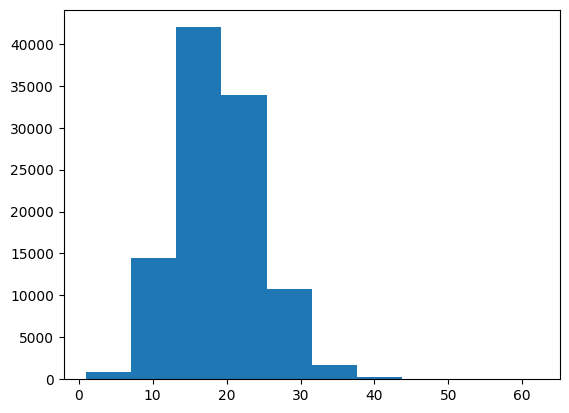

In [ ]:
plt.hist(len_tokens)

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [12]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
129966    1
129967    1
129968    1
129969    1
129970    1
Name: exceptional, Length: 129971, dtype: int64

In [ ]:
#num_classes = len(y.columns)

In [ ]:
type(X_train)

list

103976

In [13]:
model = Sequential()
#model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))

model.add(Embedding(max_tokens, 32, input_length=len(X_train)))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [14]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [17]:
history = model.fit(np.array(X_train), Y_train, validation_split=0.2, batch_size=10, epochs=15)

<ipython-input-17-608a2f75d741>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  history = model.fit(np.array(X_train), Y_train, validation_split=0.2, batch_size=10, epochs=15)


NameError: name 'Y_train' is not defined

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [16]:
history.history

NameError: name 'history' is not defined

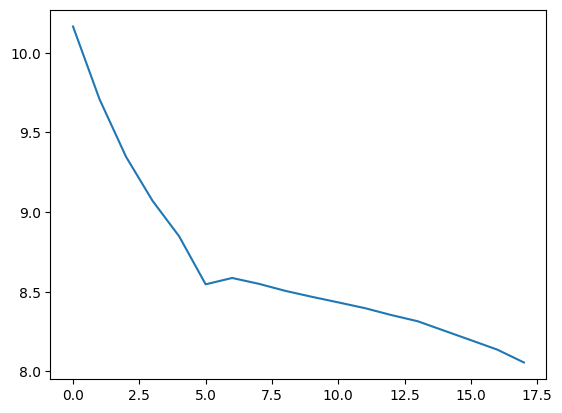

In [ ]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = model.predict(np.array(X_test))

<ipython-input-90-b51a5ef9157f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = model.predict(np.array(X_test))


ValueError: ignored

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
print(classification_report(y_test, np.round(y_pred)))